<a href="https://colab.research.google.com/github/nuot/Deep-Learning-590/blob/master/hw3_nuo_tian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AutoEncoder**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
tfkl = tfk.layers

In [2]:
# load data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# pre-processing
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
#autoencoder

autoencoder = tfk.Sequential()
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same',input_shape=(32,32,3)))
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same'))
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same'))
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.UpSampling2D((2, 2)))
autoencoder.add(tfkl.Conv2D(3,kernel_size=1, strides=1, padding='same', activation='sigmoid'))
autoencoder.summary()

#compile

autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9

In [5]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1, mode='auto')
results = autoencoder.fit(x_train,x_train,epochs=10,steps_per_epoch=10,batch_size=1000, callbacks = es_cb)

Epoch 1/10
10/10 [==============================] - 55s 5s/step - loss: 0.6739 - accuracy: 0.4366
Epoch 2/10
10/10 [==============================] - 54s 5s/step - loss: 0.5953 - accuracy: 0.4913
Epoch 3/10
10/10 [==============================] - 54s 5s/step - loss: 0.5788 - accuracy: 0.5427
Epoch 4/10
10/10 [==============================] - 54s 5s/step - loss: 0.5729 - accuracy: 0.5921
Epoch 5/10
10/10 [==============================] - 54s 5s/step - loss: 0.5702 - accuracy: 0.6227
Epoch 6/10
10/10 [==============================] - 54s 5s/step - loss: 0.5680 - accuracy: 0.6456
Epoch 7/10
10/10 [==============================] - 54s 5s/step - loss: 0.5677 - accuracy: 0.6679
Epoch 8/10
10/10 [==============================] - 58s 6s/step - loss: 0.5656 - accuracy: 0.6830
Epoch 9/10
10/10 [==============================] - 57s 6s/step - loss: 0.5641 - accuracy: 0.6997
Epoch 10/10
10/10 [==============================] - 56s 6s/step - loss: 0.5634 - accuracy: 0.7120


In [6]:
pred = autoencoder.predict(x_test)

In [7]:
# definition to show original image and reconstructed image
def showimg(orig, dec, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

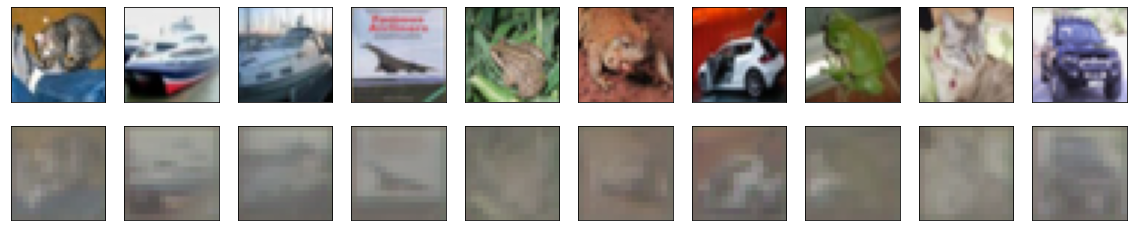

In [8]:
showimg(x_test, pred)

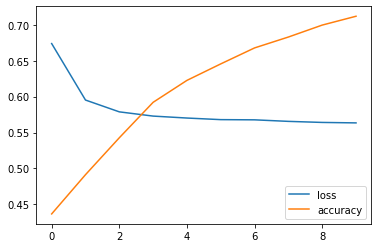

In [10]:
plt.plot(results.history['loss'])
plt.plot(results.history['accuracy'])
plt.legend(labels=['loss','accuracy'])

**Image Classification**

2.1 Deep CNN


In [11]:
model = tfk.models.Sequential([
    tfkl.Conv2D(64, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tfkl.MaxPooling2D(2,2),
    tfkl.Dropout(0.5),
    tfkl.Conv2D(32, (3,3), activation = 'relu'),
    tfkl.MaxPooling2D(2,2),
    tfkl.Dropout(0.5),
    tfkl.Conv2D(64, (3,3), activation = 'relu'),
    tfkl.MaxPooling2D(2,2),
    tfkl.Flatten(),
    tfkl.Dense(1024, activation='sigmoid'),
    tfkl.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)         

In [12]:
model.compile(optimizer=tfk.optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

from keras.utils import to_categorical
y_train1 = to_categorical(y_train,10)
y_test1 = to_categorical(y_test,10)

#es_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1, mode='auto')
results = model.fit(x_train,y_train1, steps_per_epoch=200, epochs=20, batch_size=16, validation_data=(x_test,y_test1))

Epoch 1/20
200/200 [==============================] - 13s 64ms/step - loss: 2.3062 - accuracy: 0.1325 - val_loss: 2.4199 - val_accuracy: 0.1213
Epoch 2/20
200/200 [==============================] - 12s 60ms/step - loss: 2.0609 - accuracy: 0.2281 - val_loss: 1.9527 - val_accuracy: 0.2746
Epoch 3/20
200/200 [==============================] - 12s 60ms/step - loss: 1.9298 - accuracy: 0.2788 - val_loss: 1.9546 - val_accuracy: 0.2809
Epoch 4/20
200/200 [==============================] - 12s 61ms/step - loss: 1.8342 - accuracy: 0.3150 - val_loss: 2.0954 - val_accuracy: 0.2781
Epoch 5/20
200/200 [==============================] - 13s 64ms/step - loss: 1.7824 - accuracy: 0.3378 - val_loss: 2.1149 - val_accuracy: 0.2939
Epoch 6/20
200/200 [==============================] - 12s 62ms/step - loss: 1.7078 - accuracy: 0.3547 - val_loss: 1.7492 - val_accuracy: 0.3731
Epoch 7/20
200/200 [==============================] - 12s 61ms/step - loss: 1.6667 - accuracy: 0.3956 - val_loss: 1.6572 - val_accuracy:

For this model I chose kernal size of (3,3), strides as 1, pading as default, network depth of 8

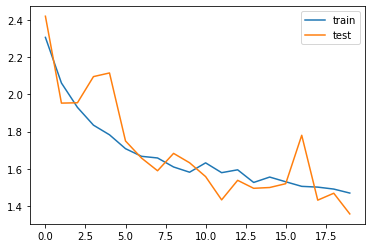

In [13]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(labels=['train','test'])

2.2 Transfer Learning


In [14]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))

58892288/58889256 [==============================] - 0s 0us/step


In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')


In [17]:
vgg = tfk.Sequential([
                      conv_base,
                      tfkl.Flatten(),
                      tfkl.Dropout(0.5),
                      tfkl.Dense(10,activation='softmax')
])
vgg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [19]:
model = tfk.Sequential()

model.add(conv_base)

for layer in model.layers:
    layer.trainable = False

model.add(tfkl.Dense(64, activation='relu'))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dense_5 (Dense)              (None, 1, 1, 64)          32832     
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

model.compile(optimizer=tfk.optimizers.RMSprop(),loss='categorical_crossentropy',metrics='accuracy')
results = model.fit(x_train,y_train1,steps_per_epoch=50, epochs=5, batch_size=64, validation_data=(x_test,y_test1))

Epoch 1/5
50/50 [==============================] - 137s 3s/step - loss: 1.9960 - accuracy: 0.3075 - val_loss: 1.8271 - val_accuracy: 0.3666
Epoch 2/5
50/50 [==============================] - 138s 3s/step - loss: 1.7449 - accuracy: 0.4047 - val_loss: 1.6542 - val_accuracy: 0.4266
Epoch 3/5
50/50 [==============================] - 139s 3s/step - loss: 1.5811 - accuracy: 0.4581 - val_loss: 1.5547 - val_accuracy: 0.4636
Epoch 4/5
50/50 [==============================] - 141s 3s/step - loss: 1.5124 - accuracy: 0.4759 - val_loss: 1.4884 - val_accuracy: 0.4889
Epoch 5/5
50/50 [==============================] - 138s 3s/step - loss: 1.4850 - accuracy: 0.4825 - val_loss: 1.4395 - val_accuracy: 0.5040


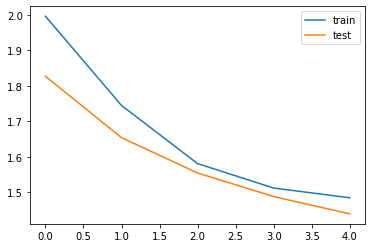

In [22]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(labels=['train','test'])

**Text Classification**

In [24]:
import pandas as pd
import numpy as np
data = pd.read_csv('SPAM_detection.csv')

In [25]:
x = np.asarray(data['Message'])
y = np.asarray(data['category_val'])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
sequence = tokenizer.texts_to_sequences(x)
X = pad_sequences(sequence, padding='post')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

3.1 RNN


In [26]:
lstm = tfk.Sequential([
                    tfkl.Embedding(len(tokenizer.word_index)+1, 16),
                    tfkl.LSTM(16, return_sequences=True),
                    tfkl.Dense(8, activation='relu'),
                    tfkl.Dropout(0.5),
                    tfkl.Dense(1, activation='sigmoid')
])


lstm.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics=['accuracy'])
lstm.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          144080    
_________________________________________________________________
lstm (LSTM)                  (None, None, 16)          2112      
_________________________________________________________________
dense_7 (Dense)              (None, None, 8)           136       
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 8)           0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 1)           9         
Total params: 146,337
Trainable params: 146,337
Non-trainable params: 0
_________________________________________________________________


In [27]:
results = lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
122/122 [==============================] - 10s 82ms/step - loss: 0.4864 - accuracy: 0.8631 - val_loss: 0.3761 - val_accuracy: 0.8820
Epoch 2/10
122/122 [==============================] - 9s 73ms/step - loss: 0.2823 - accuracy: 0.9342 - val_loss: 0.1402 - val_accuracy: 0.9643
Epoch 3/10
122/122 [==============================] - 9s 74ms/step - loss: 0.1771 - accuracy: 0.9716 - val_loss: 0.1034 - val_accuracy: 0.9783
Epoch 4/10
122/122 [==============================] - 10s 81ms/step - loss: 0.1437 - accuracy: 0.9769 - val_loss: 0.0991 - val_accuracy: 0.9802
Epoch 5/10
122/122 [==============================] - 10s 81ms/step - loss: 0.1269 - accuracy: 0.9796 - val_loss: 0.0870 - val_accuracy: 0.9809
Epoch 6/10
122/122 [==============================] - 10s 80ms/step - loss: 0.1133 - accuracy: 0.9822 - val_loss: 0.0795 - val_accuracy: 0.9845
Epoch 7/10
122/122 [==============================] - 11s 87ms/step - loss: 0.1052 - accuracy: 0.9829 - val_loss: 0.1073 - val_accuracy: 0

Text(0.5, 1.0, 'Text RNN ROC')

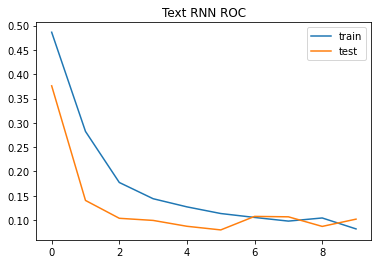

In [28]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "test"])
plt.title('Text RNN ROC')

Text(0.5, 1.0, 'Text RNN accuracy')

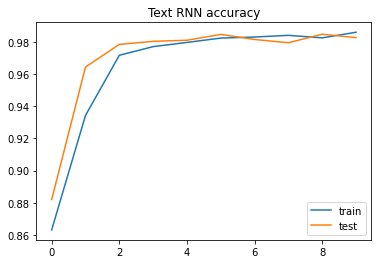

In [29]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"])
plt.legend(labels=["train", "test"])
plt.title('Text RNN accuracy')

3.2 RNN

In [36]:
cnn = tfk.Sequential([
             tfkl.Embedding(len(tokenizer.word_index)+1, 16),
             tfkl.Conv1D(32,2,1,activation='relu'),
             tfkl.MaxPool1D(),
             tfkl.Dropout(0.3),
             tfkl.Conv1D(16,2,1,activation='relu'),
             tfkl.MaxPool1D(),
             tfkl.Dropout(0.3),
             tfkl.Conv1D(8,2,1,activation='relu'),
             tfkl.MaxPool1D(),
             tfkl.Dropout(0.5),
             tfkl.GlobalMaxPool1D(),
             tfkl.Dense(1, activation = 'sigmoid')
])

cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          144080    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          1056      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 16)          1040      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 16)         

In [37]:
cnn.compile(optimizer=tfk.optimizers.RMSprop(), loss = 'binary_crossentropy', metrics=['accuracy'])

In [38]:
results = cnn.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
122/122 [==============================] - 2s 15ms/step - loss: 0.4218 - accuracy: 0.8587 - val_loss: 0.5362 - val_accuracy: 0.8714
Epoch 2/20
122/122 [==============================] - 2s 16ms/step - loss: 0.3802 - accuracy: 0.8636 - val_loss: 0.5207 - val_accuracy: 0.8714
Epoch 3/20
122/122 [==============================] - 2s 17ms/step - loss: 0.2259 - accuracy: 0.9082 - val_loss: 0.4302 - val_accuracy: 0.8828
Epoch 4/20
122/122 [==============================] - 2s 17ms/step - loss: 0.1060 - accuracy: 0.9641 - val_loss: 0.3355 - val_accuracy: 0.9264
Epoch 5/20
122/122 [==============================] - 2s 15ms/step - loss: 0.0695 - accuracy: 0.9800 - val_loss: 0.2391 - val_accuracy: 0.9587
Epoch 6/20
122/122 [==============================] - 2s 16ms/step - loss: 0.0521 - accuracy: 0.9851 - val_loss: 0.2144 - val_accuracy: 0.9575
Epoch 7/20
122/122 [==============================] - 2s 16ms/step - loss: 0.0419 - accuracy: 0.9897 - val_loss: 0.1657 - val_accuracy: 0.9569

Text(0.5, 1.0, 'Text CNN ROC')

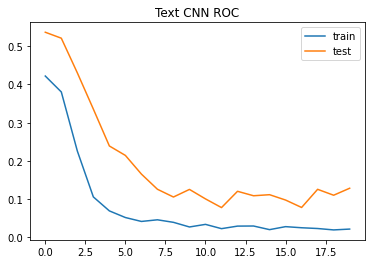

In [39]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "test"])
plt.title('Text CNN ROC')

Text(0.5, 1.0, 'CNN Accuracy')

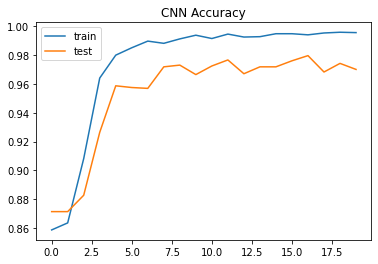

In [40]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"])
plt.legend(labels=["train", "test"])
plt.title('CNN Accuracy')
